In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

<h2>Cumulative Violations

<h4>Adverserial Generation Continuous AC

In [2]:
cac_adv_working_dir = 'drl/'
cac_adv_iterations_dir = [d for d in os.listdir(cac_adv_working_dir) if os.path.isdir(cac_adv_working_dir + d)]
cac_adv_iterations = {}
for iter_folder in cac_adv_iterations_dir:
    try:
        cac_adv_iterations[iter_folder] = {'total_violations': 0}
        violation_scores = pd.read_csv(cac_adv_working_dir  + iter_folder + '/' + 'violation_scores_' + iter_folder + '.csv', index_col=0)
        violations = violation_scores['A.RTL2'].to_list()
        for v in violations:
            cac_adv_iterations[iter_folder]['total_violations'] += max(0, v)
    except Exception as e:
        print(e)

total_violation_score_cac_adv = 0
cac_scores = []
for cac_iter in cac_adv_iterations:
    total_violation_score_cac_adv += cac_adv_iterations[cac_iter]['total_violations']
    cac_scores.append(cac_adv_iterations[cac_iter]['total_violations'])
total_violation_score_cac_adv

cum_cac_scores = []
for i in range(1, len(cac_scores)+1): cum_cac_scores.append(sum(cac_scores[:i]))

In [3]:
random_working_dir = 'rand/'
rand_iterations_dir = [d for d in os.listdir(random_working_dir) if os.path.isdir(random_working_dir + d)]
rand_iterations = {}
rand_iterations
for iter_folder in rand_iterations_dir:
    try:
        violation_scores = pd.read_csv(random_working_dir  + iter_folder + '/' + 'violation_scores_' + iter_folder + '.csv', index_col=0)
        rand_iterations[iter_folder] = {'total_violations': 0}
        violations = violation_scores['A.RTL2'].to_list()
        for v in violations:
            rand_iterations[iter_folder]['total_violations'] += max(0, v)
    except Exception as e:
        print(e)

total_violation_score_rand = 0
rand_scores = []
for rand_iter in rand_iterations:
    total_violation_score_rand += rand_iterations[rand_iter]['total_violations']
    rand_scores.append(rand_iterations[rand_iter]['total_violations'])
total_violation_score_rand
print(rand_scores)

cum_rand_scores = []
for i in range(1, len(rand_scores)+1): cum_rand_scores.append(sum(rand_scores[:i]))

[33.218999999999994, 41.519999999999996, 15.0, 5.7139999999999995, 45.998000000000026, 1.3649999999999998, 0, 0.5429999999999999, 8.596, 3.7380000000000004, 68.71799999999999, 31.24900000000001, 49.911999999999985, 19.081, 1.3990000000000002, 2.6550000000000002, 0, 33.25699999999999, 3.2030000000000003, 1.244, 0, 0, 1.2409999999999999, 37.83199999999998, 25.755000000000017]


In [4]:
ga_working_dir = 'ga/'
ga_iterations_dir = [d for d in os.listdir(ga_working_dir) if os.path.isdir(ga_working_dir + d)]
ga_iterations = {}
for iter_folder in ga_iterations_dir:
    try:
        violation_scores = pd.read_csv(ga_working_dir  + iter_folder + '/' + 'violation_scores_' + iter_folder + '.csv', index_col=0)
        ga_iterations[iter_folder] = {'total_violations': 0}
        violations = violation_scores['A.RTL2'].to_list()
        for v in violations:
            ga_iterations[iter_folder]['total_violations'] += max(0, v)
    except Exception as e:
        print(e)

total_violation_score_ga = 0
ga_scores = []
for ga_iter in ga_iterations:
    total_violation_score_ga += ga_iterations[ga_iter]['total_violations']
    ga_scores.append(ga_iterations[ga_iter]['total_violations'])
total_violation_score_ga
print(ga_scores)

cum_ga_scores = []
for i in range(1, len(ga_scores)+1): cum_ga_scores.append(sum(ga_scores[:i]))

[33.932, 9.534, 4.518000000000001, 16.308, 73.39399999999996, 26.425000000000004, 77.91200000000008, 90.581, 123.04900000000002, 108.20899999999996, 8.030999999999997, 0, 8.6, 152.29199999999994, 48.12300000000002, 122.73700000000002, 21.937999999999995, 33.199999999999996, 0.459, 8.754000000000001, 30.533999999999985, 87.29000000000005, 0, 65.74699999999999, 11.475999999999999]


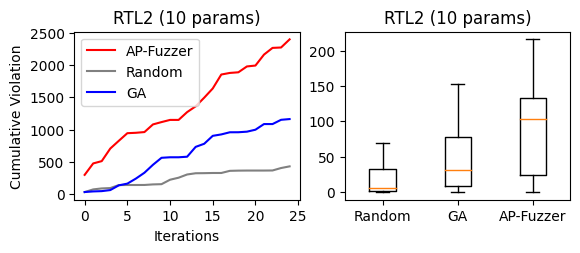

<Figure size 640x480 with 0 Axes>

In [5]:

# gs = gridspec.GridSpec(1, 2) 
plt.subplot(2, 2, 1)

plt.plot([i for i in range(len(cum_cac_scores))], cum_cac_scores, label="AP-Fuzzer", color="red")
plt.plot([i for i in range(len(cum_rand_scores))], cum_rand_scores, label="Random", color="gray")
plt.plot([i for i in range(len(cum_ga_scores))], cum_ga_scores, label="GA", color="blue")
plt.title('RTL2 (10 params)')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Violation')
# plt.axhline(y=0, color='r', linestyle='--')
plt.xticks([i for i in range(30)][::5])
# plt.ylim(-1.5, 1.5)
plt.legend()
# plt.show()
# plt.clf()

plt.subplot(2, 2, 2)
# Creating plot
plt.title('RTL2 (10 params)')
plt.boxplot([rand_scores, ga_scores, cac_scores], widths=(.35, .35, .35), showfliers=False)
plt.xticks([1,2, 3],['Random', 'GA', 'AP-Fuzzer'])
 
# show plot
plt.show()
plt.clf()